In [1]:
from setfit import SetFitModel, SetFitTrainer, sample_dataset
from datasets import load_dataset, Dataset
from sentence_transformers.losses import CosineSimilarityLoss

import pandas as pd
import seaborn as sns

c:\Users\niloy\anaconda3\envs\torch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read Data -> Dataset used here is the twitter extracted sentiment dataset from Kaggle
trainDS = pd.read_csv('train.csv')
trainDS.sample(10)

,textID,text,selected_text,sentiment
24580,aa1c6537f7,if not impossible,if not impossible,neutral
10445,589aae6fa5,People from England can watch this one Thankyou,Thankyou,positive
2113,7e260b1f13,man i wont be home to co host with you! xo*...,n i wont be home to co host with you!,negative
27264,5cc5c97a8c,No problem. I`m just sharing the whole list t...,No problem. I`m just sharing the whole list to...,neutral
27022,3c10d3d16d,_the_bear I love the names!,I love the names!,positive
1741,e36e03078c,Phone will die soon. What to do now? Oh no!,die,negative
3806,f674c6d0ac,ask to create a fake competetion and declare...,te a fake competetion,negative
1734,bf7a986c6d,Is warm soy milk and amazake with cocoa powder...,Is warm soy milk and amazake with cocoa powder...,neutral
15872,266b8792a0,Just broke my favorite necklace superglue?,Just broke my favorite necklace,negative
15385,08a8d660b1,I wish I knew someone down there who could h...,p. a friend told me once that they got crapp...,negative


In [3]:
replacement_dict = {'positive': 1, 'negative': 2, 'neutral': 0}
trainDS['sentiment'] = trainDS['sentiment'].replace(replacement_dict)

In [4]:
trainDS.sample(10)

,textID,text,selected_text,sentiment
1586,3fb2f8bda0,try to play John Travolta`s 'Grease Lightning'...,it`s cool,1
20728,3a60b61aa6,Do you guys like fish sticks?,Do you guys like fish sticks?,0
8845,b24e9dfc28,Molly was born on my birthday!!!! *cue twilig...,*cue,1
2234,900a88bb34,Missing my baby ducks,Missing my baby ducks,2
6770,ee257f56bd,"Yes! Cold coffee from yesterday. No sugar, no ...","Yes! Cold coffee from yesterday. No sugar, no ...",1
18423,91ec937e7a,is almost over the legal limit of db at the ga...,is almost over the legal limit of,2
8267,59de82ec28,Watching jackass the movie http://twitpic.com...,Watching jackass the movie http://twitpic.com...,0
8961,e4ad1b35d2,july... too long,july... too long,2
21376,eaf2942ee8,bud light?!?!?! up in Massachusetts and no B...,ht?,1
25622,5da43b3792,Glad TS brought it! Sorry about ur foot short...,Sorry,2


In [5]:
trainDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 858.9+ KB


(27481, 4)


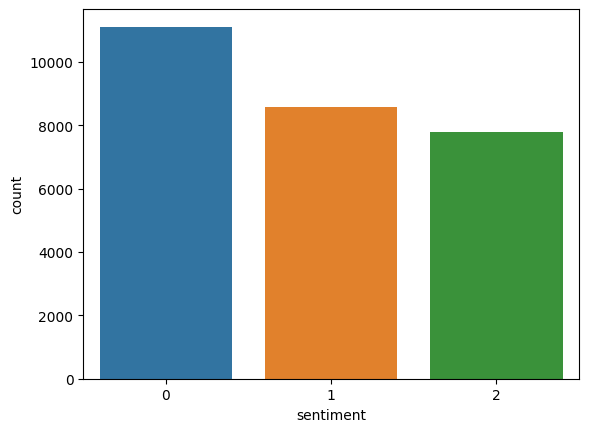

In [6]:
sns.countplot(trainDS,x='sentiment')
print(trainDS.shape)

In [7]:
sampleDS = trainDS[:100]   # 100 sample taken
sampleDS.to_csv('sampleTrainDS.csv')

valDS = trainDS[27460:]     # last 20 sample taken for validation
valDS.to_csv('sampleValDS.csv')

In [8]:
# Load Dataset
dataset = load_dataset('csv', data_files={
    'train':['sampleTrainDS.csv'],
    'eval':['sampleValDS.csv']},
)

Extracting data files: 100%|██████████| 2/2 [00:00<00:00, 386.43it/s]


Dataset csv downloaded and prepared to C:/Users/niloy/.cache/huggingface/datasets/csv/default-6e727f847d4014f9/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


100%|██████████| 2/2 [00:00<00:00, 82.37it/s]


The training part was error prone in ipynb format, thats why it was done on a modular file.

In [9]:
# Model from Huggingface
# model = SetFitModel.from_pretrained(
#     "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
# )

In [10]:
# trainer
# trainer = SetFitTrainer(
#     model=model,
#     train_dataset=dataset['train'],
#     eval_dataset=dataset['eval'],
#     loss_class=CosineSimilarityLoss,
#     metric="accuracy",
#     batch_size=16,
#     num_iterations=20,  # The number of text pairs to generate for contrastive learning
#     num_epochs=1,  # The number of epochs to use for contrastive learning
#     column_mapping={"text": "text", "sentiment": "label"}  # Map dataset columns to text/label expected by trainer
# )

In [11]:
# trainer.train()
# metrics = trainer.evaluate()

In [12]:
# save
# trainer.model._save_pretrained(save_directory="miniLM")